In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
df = pd.read_csv("/content/result.csv")
df.head()

,method,task,trainable_params,total_params,accuracy,rouge1,rougeL
0,full_ft,classification,60000000,60000000,0.88,NaN,NaN
1,lora,classification,1200000,60000000,0.86,NaN,NaN
2,prefix,classification,500000,60000000,0.84,NaN,NaN
3,prompt,classification,300000,60000000,0.82,NaN,NaN
4,full_ft,summarization,60000000,60000000,NaN,35.2,32.1


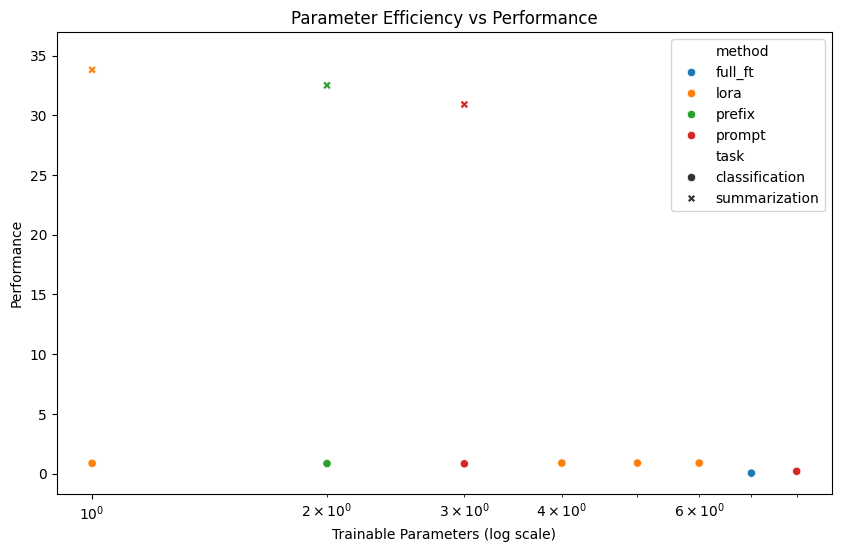

In [2]:
# Plot performance vs parameters
df['performance'] = df['accuracy'].fillna(df['rouge1'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trainable_params', y='performance', hue='method', style='task')
plt.xscale('log')
plt.xlabel('Trainable Parameters (log scale)')
plt.ylabel('Performance')
plt.title('Parameter Efficiency vs Performance')
plt.legend()
plt.show()

In [5]:
# Summary statistics
# Convert 'trainable_params' to numeric, coercing errors to NaN
df['trainable_params'] = pd.to_numeric(df['trainable_params'], errors='coerce')

summary = df.groupby(['method', 'task']).agg({
    'trainable_params': 'mean',
    'performance': 'mean'
}).reset_index()
summary

,method,task,trainable_params,performance
0,full_ft,classification,68480576.0,0.459000
1,full_ft,summarization,60000000.0,35.200000
2,lora,classification,236016.0,0.877778
3,lora,summarization,1200000.0,33.800000
4,prefix,classification,500000.0,0.840000
5,prefix,summarization,500000.0,32.500000
6,prompt,classification,160240.0,0.504000
7,prompt,summarization,300000.0,30.900000
